In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Evaluation Project Phase - Week 2 - (07-02)\loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [130]:
df.drop({'Loan_ID','Gender','Married','Education'},axis=1,inplace=True)
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [131]:
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Self_Employed'].value_counts()

0    500
1     82
2     32
Name: Self_Employed, dtype: int64

In [132]:
LE.inverse_transform([0,1,2])

array(['No', 'Yes', nan], dtype=object)

In [133]:
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [134]:
LE.inverse_transform([0,1,2])

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [135]:
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [136]:
LE.inverse_transform([0,1])

array(['N', 'Y'], dtype=object)

In [137]:
df.isnull().sum()

Dependents           15
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [138]:
df["Dependents"]= df["Dependents"].replace("3+",3)
df["Dependents"]= df["Dependents"].replace("0",0)
df["Dependents"]= df["Dependents"].replace("1",1)
df["Dependents"]= df["Dependents"].replace("2",2)

In [139]:
df['Dependents'] = df['Dependents'].fillna(0)

In [2]:
df['LoanAmount'].fillna(int(df['LoanAmount'].mean()), inplace=True)

NameError: name 'df' is not defined

In [141]:
df['Loan_Amount_Term'].fillna(int(df['Loan_Amount_Term'].mean()), inplace=True)

In [142]:
df['Credit_History'].fillna(int(df['Credit_History'].mean()), inplace=True)

In [144]:
df.describe()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,0.237785,5403.459283,1621.245798,146.397394,342.000000,0.773616,1.037459,0.687296
std,1.009623,0.534737,6109.041673,2926.248369,84.037503,64.372489,0.418832,0.787482,0.463973
min,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,3.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [145]:
df.corr()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,1.000000,0.025177,0.118202,0.030430,0.163108,-0.101054,-0.017523,-0.000244,0.010118
Self_Employed,0.025177,1.000000,0.095664,0.052218,0.089810,-0.036965,0.000380,-0.013439,0.010880
ApplicantIncome,0.118202,0.095664,1.000000,-0.116605,0.565621,-0.045242,0.006986,-0.009500,-0.004710
CoapplicantIncome,0.030430,0.052218,-0.116605,1.000000,0.187863,-0.059675,-0.058795,0.010522,-0.059187
LoanAmount,0.163108,0.089810,0.565621,0.187863,1.000000,0.038812,-0.034518,-0.044818,-0.036345
Loan_Amount_Term,-0.101054,-0.036965,-0.045242,-0.059675,0.038812,1.000000,0.005446,-0.077620,-0.020974
Credit_History,-0.017523,0.000380,0.006986,-0.058795,-0.034518,0.005446,1.000000,-0.018761,0.432616
Property_Area,-0.000244,-0.013439,-0.009500,0.010522,-0.044818,-0.077620,-0.018761,1.000000,0.032112
Loan_Status,0.010118,0.010880,-0.004710,-0.059187,-0.036345,-0.020974,0.432616,0.032112,1.000000


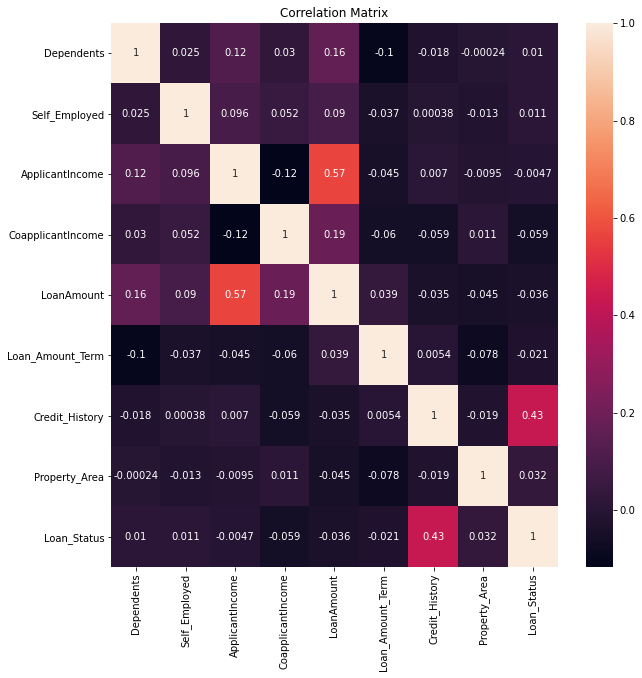

In [146]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[10,10])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

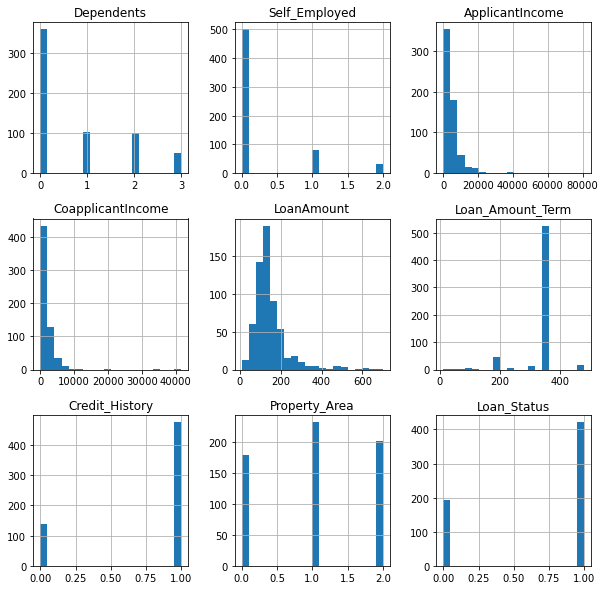

In [147]:
df.hist(bins=20,figsize=(10,10))
plt.show()

In [148]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [149]:
x.skew().sort_values(ascending=False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.727127
Self_Employed        2.191118
Dependents           1.015551
Property_Area       -0.066196
Credit_History      -1.310835
Loan_Amount_Term    -2.389680
dtype: float64

In [150]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [151]:
x.skew().sort_values(ascending=False)

Self_Employed        1.620854
Dependents           0.441404
Loan_Amount_Term     0.389827
LoanAmount           0.024311
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
Property_Area       -0.158267
Credit_History      -1.310835
dtype: float64

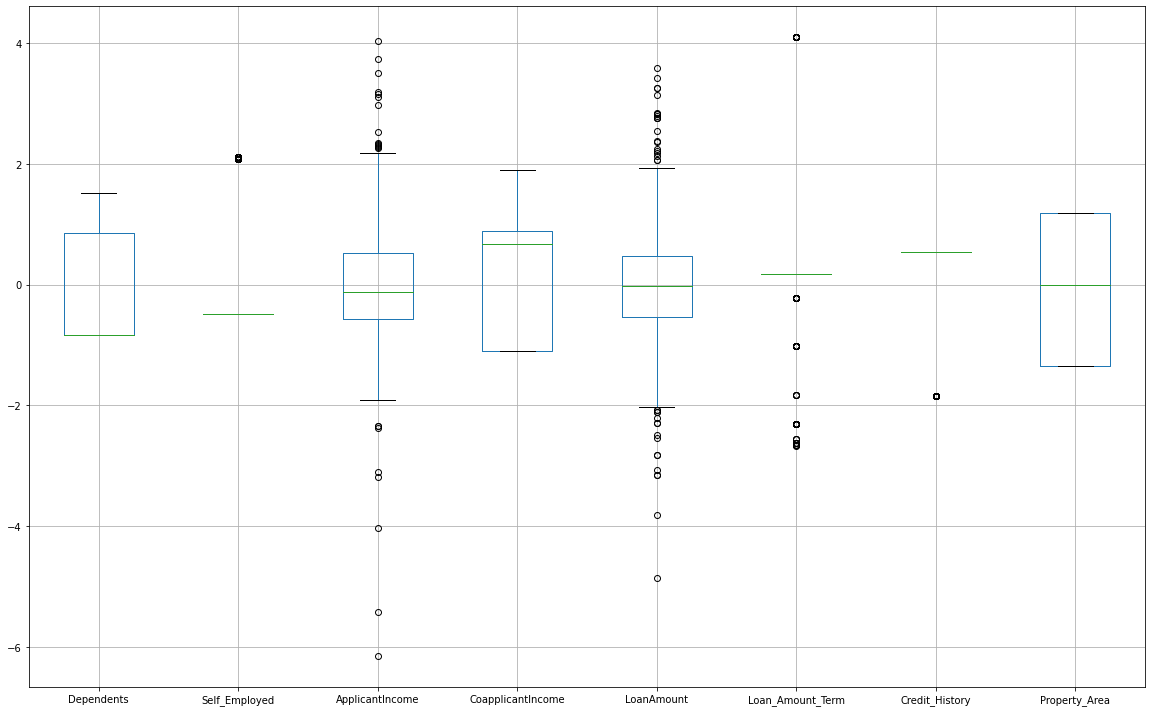

In [152]:
x.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [153]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(614, 8)

In [154]:
threshold=2.5
print(np.where(z>2.5))

(array([ 14,  14,  28,  68,  75,  94,  94, 109, 126, 130, 130, 133, 133,
       147, 155, 155, 168, 171, 171, 177, 179, 183, 185, 188, 216, 228,
       242, 248, 262, 270, 278, 293, 298, 308, 313, 333, 333, 358, 366,
       369, 378, 409, 443, 468, 487, 495, 497, 500, 500, 506, 516, 523,
       546, 555, 561, 568, 573, 575, 585, 600, 604], dtype=int64), array([4, 5, 4, 5, 5, 4, 5, 5, 2, 4, 5, 4, 5, 4, 2, 4, 5, 2, 4, 4, 5, 2,
       2, 2, 2, 5, 5, 5, 5, 4, 4, 5, 5, 4, 5, 2, 4, 5, 5, 4, 5, 2, 2, 2,
       4, 5, 5, 2, 5, 4, 5, 4, 5, 4, 4, 4, 5, 5, 5, 2, 4], dtype=int64))


In [155]:
x_new=x[(z<2.5).all(axis=1)]
print(x.shape)
print(x_new.shape)

(614, 8)
(561, 8)


In [156]:
loss_percent=(614-561)/614*100
print(loss_percent)

8.631921824104234


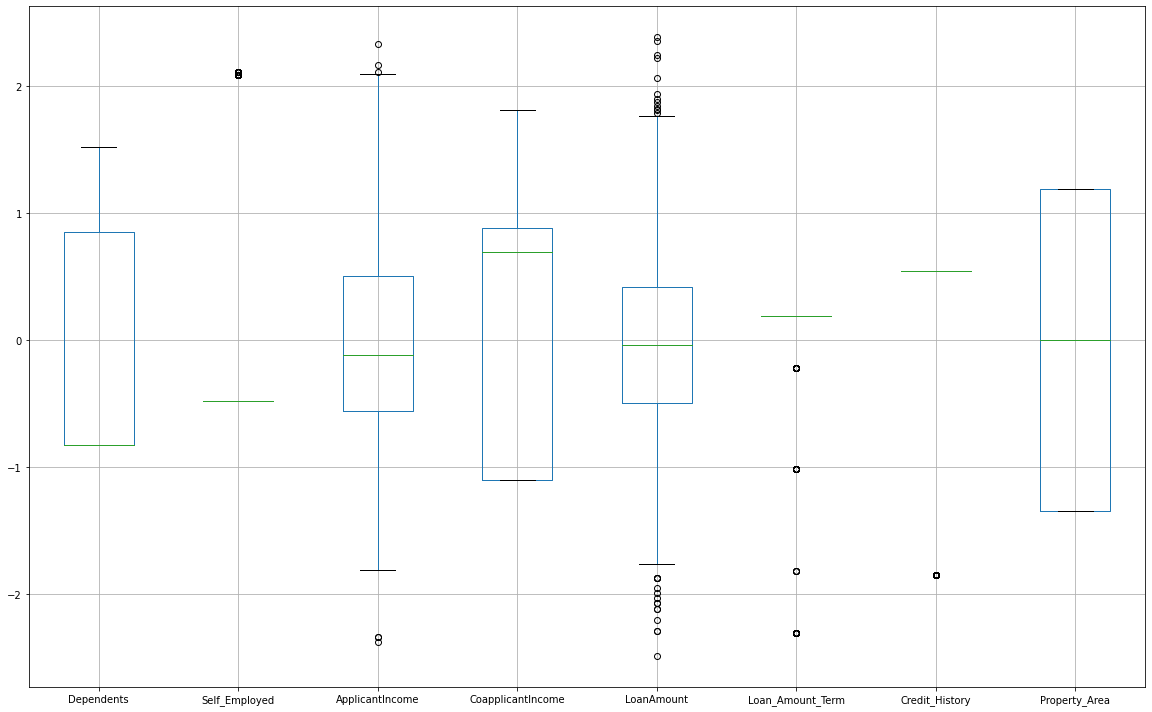

In [157]:
x_new.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [158]:
y_new=y[(z<2.5).all(axis=1)]
print(y.shape)
print(y_new.shape)

(614,)
(561,)


In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0 # max accuracy
maxRS=0 # best random state value for which max accuracy is achieved
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train) # Fitting the data will train the model
    predrf=LR.predict(x_test) # Predicting the data # Predicted traget variable
    acc=accuracy_score(y_test,predrf) # two target varaible # accuracy score
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Randon_state ",maxRS)

Best accuracy is  0.8672566371681416 on Randon_state  78


In [160]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=78)

In [161]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 86.72566371681415
[[21 12]
 [ 3 77]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        33
           1       0.87      0.96      0.91        80

    accuracy                           0.87       113
   macro avg       0.87      0.80      0.82       113
weighted avg       0.87      0.87      0.86       113



In [162]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 74.33628318584071
[[17 16]
 [13 67]]
              precision    recall  f1-score   support

           0       0.57      0.52      0.54        33
           1       0.81      0.84      0.82        80

    accuracy                           0.74       113
   macro avg       0.69      0.68      0.68       113
weighted avg       0.74      0.74      0.74       113



In [163]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 82.30088495575221
[[17 16]
 [ 4 76]]
              precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.83      0.95      0.88        80

    accuracy                           0.82       113
   macro avg       0.82      0.73      0.76       113
weighted avg       0.82      0.82      0.81       113



In [164]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 86.72566371681415
[[21 12]
 [ 3 77]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        33
           1       0.87      0.96      0.91        80

    accuracy                           0.87       113
   macro avg       0.87      0.80      0.82       113
weighted avg       0.87      0.87      0.86       113



In [165]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_new,y_new,cv=5)
print("Cross Validation Score Of Logistic Regression Model :",scr.mean())
scr1=cross_val_score(dt,x_new,y_new,cv=5)
print("Cross Validation Score Of Decision Tree Model :",scr.mean())
scr2=cross_val_score(rf,x_new,y_new,cv=5)
print("Cross Validation Score Of Random Forest Model :",scr2.mean())
scr3=cross_val_score(svc,x_new,y_new,cv=5)
print("Cross Validation Score Of SVC Model :",scr3.mean())

Cross Validation Score Of Logistic Regression Model : 0.7860461441213653
Cross Validation Score Of Decision Tree Model : 0.7860461441213653
Cross Validation Score Of Random Forest Model : 0.7468394437420987
Cross Validation Score Of SVC Model : 0.7806890012642225


In [166]:
from sklearn.model_selection import GridSearchCV
# Create parameters list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridSearchCV
GCV_pred=GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test,GCV_pred) # checking final accuracy

0.8672566371681416

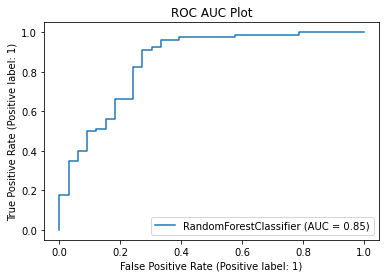

In [167]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [168]:
a=np.array(y_test)
predicted=np.array(LR.predict(x_test))
Loan=pd.DataFrame({'Original_Data':a,'Predicted_Data':predicted},index=range(len(a)))
Loan

,Original_Data,Predicted_Data
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,1
6,0,0
7,1,1
8,0,1
9,1,1


In [169]:
# Model Saving
import pickle
filename = 'Loan_Application_Status.pkl'
pickle.dump(LR,open(filename,'wb'))

# Thank you...!!!